In [21]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import warnings


os.chdir('/Users/vladimirdimitrov/NLP-case')
warnings.filterwarnings("ignore")

In [2]:
data_hh = pd.read_csv('data/interim/hh_database_clear.csv', index_col=0)

### ЗП

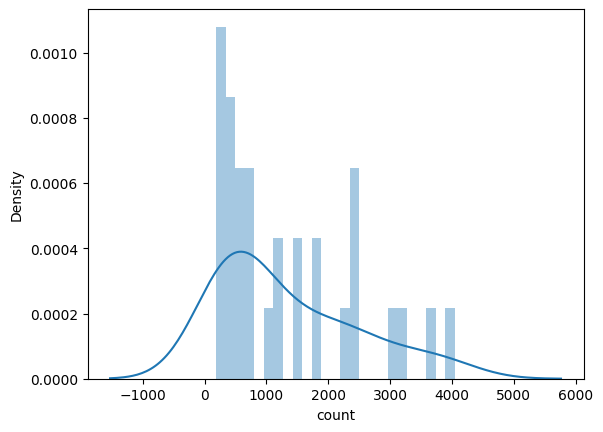

In [3]:
value_money = data_hh['Money'].value_counts()[:30]
sns.distplot(value_money, bins=25);

In [4]:
value_money[:5]

Money
50000    4046
40000    3724
30000    3230
60000    3086
70000    2391
Name: count, dtype: int64

In [5]:
trace1 = go.Bar(
    y=value_money.values,
    x=value_money.index,
)

data = [trace1]
layout = go.Layout(
    title="Гистограма зарплат ",
    xaxis={
        'title':"Заработная плата",
    },
    yaxis={
        'title':"Количество людей",
    }
)
figure=go.Figure(data=data,layout=layout)
py.offline.iplot(figure)

### Пол

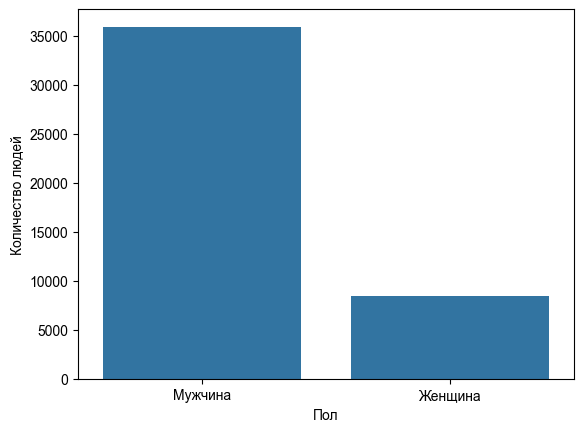

In [6]:
value_sex = data_hh['Sex'].value_counts()
sns.barplot(value_sex)
sns.set_style('white')
plt.title('')
plt.xlabel('Пол')
plt.ylabel('Количество людей');

In [13]:
money_men = data_hh[data_hh['Sex'] == 'Мужчина']['Money'].value_counts()[:30]
money_women = data_hh[data_hh['Sex'] == 'Женщина']['Money'].value_counts()[:30]

In [16]:
trace1 = go.Bar(
    x=money_men.index,
    y=money_men.values,
    name='Мужчины'
)
trace2 = go.Bar(
    x=money_women.index,
    y=money_women.values,
    name='Женщины'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title="Гистограмма зарплат в разрезе пола",
    xaxis={
        'title':"Количество людей",
    },
    yaxis={
        'title':"Зарплаты",
    }
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


### Нынешняя Должность

In [30]:
value_position_now = data_hh['Последняя/нынешняя должность'].value_counts()[:30]
fig = px.histogram(value_position_now, x=value_position_now.index, y=value_position_now.values)
fig.update_layout(
    title={"text": "", "x": 0.5}, yaxis_title="Количество Людей"
)
fig.show()